In [1]:
#load Data set
import pandas as pd

In [2]:
file_path=r"C:\Users\ujjwa\Downloads\Alphabets_data.csv"

In [3]:
data=pd.read_csv(file_path)

In [4]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
# Explore the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6    

In [6]:
#Data Preprocessing:
# Check for missing values
print(data.isnull().sum())

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [7]:
# Option 2: Convert non-numeric columns to numeric using Label Encoding (for categorical data)
from scipy import stats
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

In [8]:
data[column]

0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: letter, Length: 20000, dtype: int32

In [9]:
from scipy import stats
import numpy as np

# Remove outliers using Z-score
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [10]:
z_scores

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,0.864204,1.057698,0.291877,1.053277,0.164704,1.144013,0.544130,2.365097,1.714360,0.344994,0.917071,1.347774,0.034125,1.305948,0.219082,1.438153,0.122911
1,0.602074,0.510385,1.502358,1.053277,0.719730,0.687476,1.531305,1.075326,0.137561,0.495072,1.895968,1.312807,0.514764,0.448492,0.219082,0.120081,1.359441
2,1.268564,0.012309,1.199738,0.435910,1.161947,1.138672,1.531305,0.645273,0.973591,0.344994,0.690380,1.312807,0.446513,0.019764,0.865626,0.269477,0.741176
3,0.064416,1.555774,1.199738,0.435910,0.277513,0.230939,0.936631,0.644886,0.232823,0.344994,1.720796,0.932724,0.995402,1.266419,1.074008,0.659036,0.122911
4,0.868670,1.057698,1.826464,1.053277,1.933571,1.144013,0.544130,0.645273,0.507945,0.344994,0.917071,0.552641,0.514764,0.877220,0.865626,0.509640,1.359441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.268564,1.057698,1.523844,1.053277,1.049137,0.687476,0.050543,0.215220,0.878329,0.344994,0.917071,0.172558,1.888428,0.448492,0.219082,0.269477,0.495354
19996,1.401862,1.555774,0.897117,1.428701,1.161947,0.225598,1.430218,0.214833,0.507945,1.605094,1.494105,0.967691,2.437316,0.448492,0.427463,0.269477,0.495354
19997,0.864204,1.033079,0.594497,0.435910,0.719730,0.682135,0.443044,1.504991,0.603207,0.765028,1.092242,0.967691,1.407789,0.448492,2.367097,0.659036,2.350149
19998,0.730906,1.057698,1.221224,0.556881,1.491354,1.144013,0.544130,0.215220,0.973591,0.344994,0.690380,0.172558,0.034125,0.877220,0.427463,0.509640,0.122911


In [11]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,18,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [12]:
#4Scale the Features:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [13]:
scaled_data 

array([[ 0.871328  , -1.06540007,  0.33816256, ..., -0.23380813,
        -1.53358015,  0.1224903 ],
       [-0.58280822,  0.60337442,  1.55809263, ..., -0.23380813,
         0.10599709,  1.38606715],
       [-1.24377923,  0.04711626,  1.25311011, ..., -0.90576277,
        -0.30389722,  0.75427873],
       ...,
       [ 0.871328  ,  1.15963259,  0.64314508, ...,  2.45401042,
        -0.71379153, -2.40466341],
       [ 0.7391338 , -1.06540007, -1.18675003, ...,  0.43814651,
         0.5158914 ,  0.1224903 ],
       [-1.64036184,  0.04711626,  0.64314508, ..., -0.90576277,
        -0.71379153,  0.1224903 ]])

In [14]:
#Step 2: Exploratory Data Analysis (EDA)
#Visualize Data Distribution:
import seaborn as sns
import matplotlib.pyplot as plt




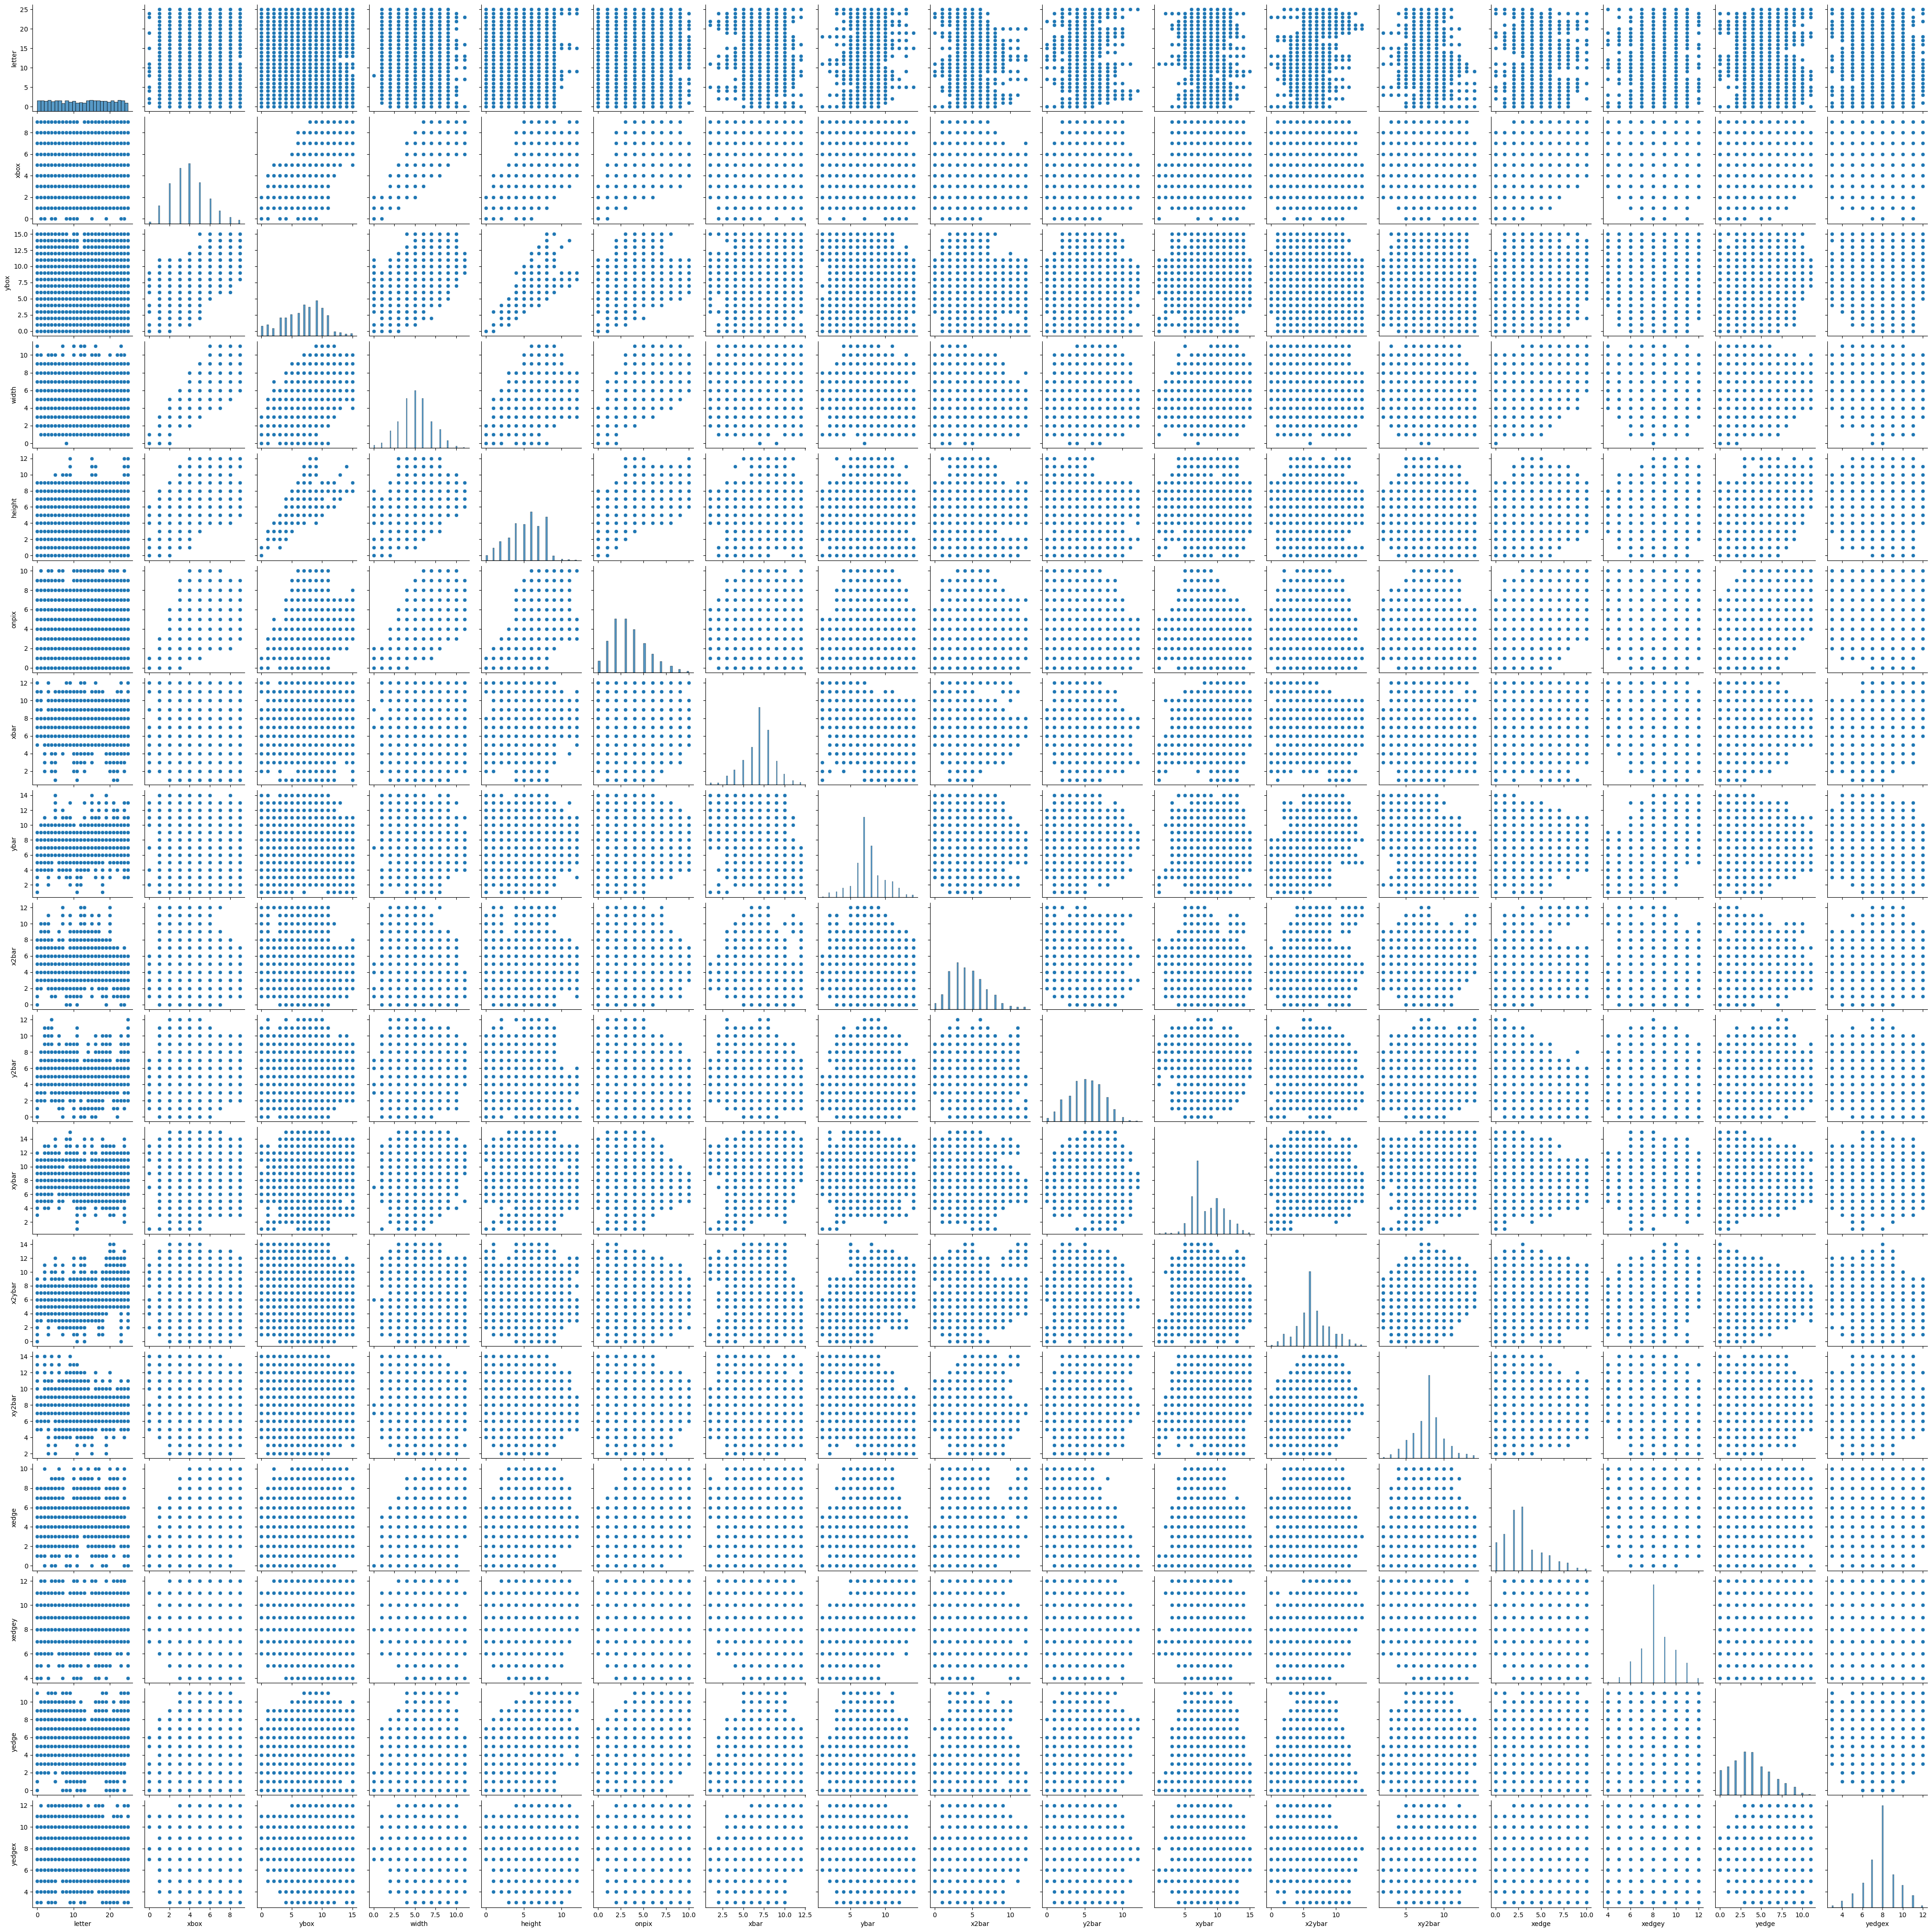

In [15]:
sns.pairplot(data)
plt.show()




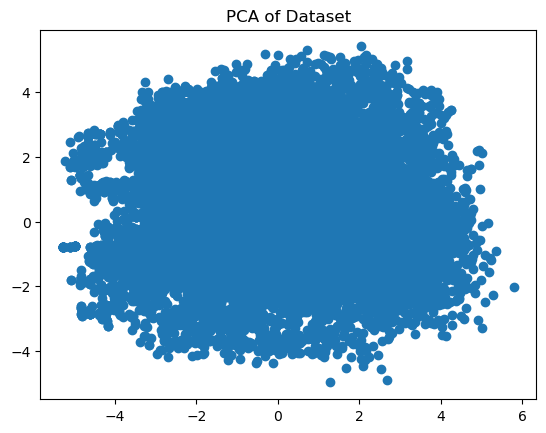

In [16]:
#Identify Potential Clusters:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('PCA of Dataset')
plt.show()

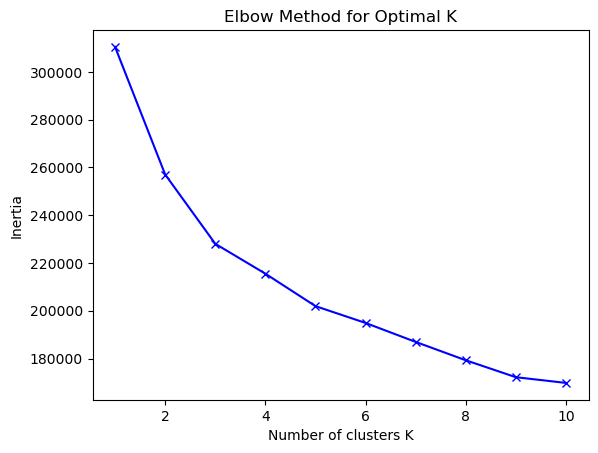

In [17]:
#Step 3: Implementing Clustering Algorithms
#K-Means Clustering:
from sklearn.cluster import KMeans

# Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()



In [18]:
# Fit K-Means with optimal K
optimal_k = 3  # Example optimal K
kmeans = KMeans(n_clusters=optimal_k)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [19]:
kmeans_labels

array([1, 2, 2, ..., 1, 0, 2])

In [20]:
#Hierarchical Clustering:
from scipy.cluster.hierarchy import dendrogram, linkage



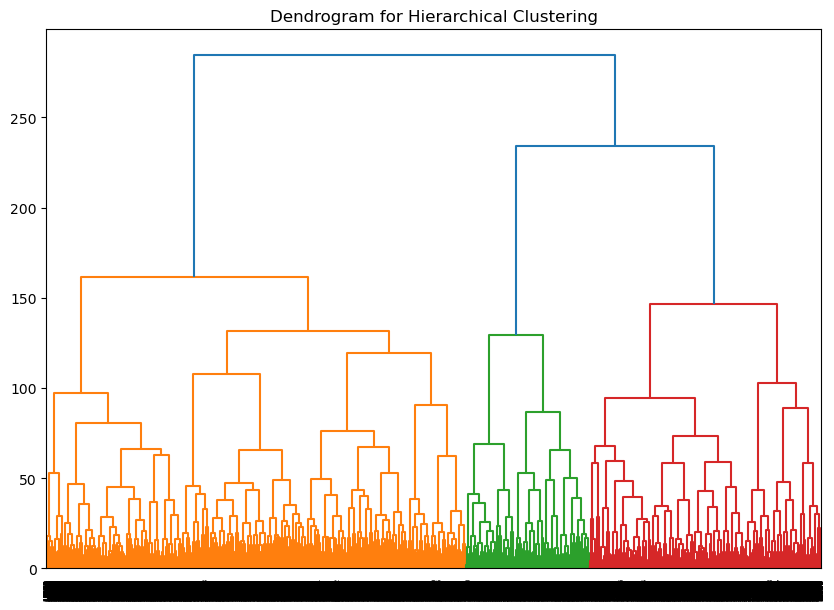

In [21]:
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

In [22]:
# Fit hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_labels = hierarchical.fit_predict(scaled_data)

In [23]:
hierarchical_labels

array([2, 0, 0, ..., 2, 1, 1], dtype=int64)

In [25]:
#DBSCAN:
#Implement DBSCAN and experiment with different parameters.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [26]:
dbscan_labels

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [27]:
#Step 4: Cluster Analysis and Interpretation
#Analyze Clusters:
# Example analysis
kmeans_clusters = pd.DataFrame(scaled_data, columns=data.columns)
kmeans_clusters['Cluster'] = kmeans_labels
print(kmeans_clusters.groupby('Cluster').mean())

           letter      xbox      ybox     width    height     onpix      xbar  \
Cluster                                                                         
0       -0.284277 -0.896453 -0.861918 -0.896868 -0.858613 -0.784759  0.106733   
1        0.692942  0.166730  0.080316  0.128070  0.015803 -0.269790 -0.806904   
2       -0.124704  0.629325  0.645606  0.649242  0.675658  0.761540  0.323808   

             ybar     x2bar     y2bar     xybar    x2ybar    xy2bar     xedge  \
Cluster                                                                         
0       -0.371833  0.076299  0.036813 -0.128870 -0.326088  0.212008 -0.482819   
1        1.211798 -0.444987 -0.182256  0.424028  1.179475 -0.457724 -0.155819   
2       -0.317851  0.164687  0.063023 -0.112209 -0.337900  0.063083  0.463382   

           xedgey     yedge    yedgex  
Cluster                                
0       -0.356707 -0.254307  0.225037  
1        1.056920 -0.714404 -0.676129  
2       -0.251431  0.564421 